## BREAST CANCER - DATA ANALYSIS AND MODEL DEPLOYMENT

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("datasets_56485_108594_Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


## SPLIT DATASET IN TRAINING SET AND TEST SET

In [11]:
# split dataset into feature and label
y = data['diagnosis']
x = data.drop(['diagnosis'], axis=1)

In [12]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [13]:
len(x_train)

455

In [14]:
len(x_test)

114

## MODEL SELECTION

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [19]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

C:\Users\khandelwal\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\khandelwal\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:

scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9138840070298769,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.9226713532513181,
  'best_params': {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}}]

## MODEL BUILDING

In [21]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)

In [22]:

model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
model_xgb.score(x_test,y_test)

0.9298245614035088

In [25]:
x_test.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
512,13.40,20.52,88.64,556.7,0.11060
457,13.21,25.25,84.10,537.9,0.08791
439,14.02,15.66,89.59,606.5,0.07966
298,14.26,18.17,91.22,633.1,0.06576
37,13.03,18.42,82.61,523.8,0.08983


In [26]:
x_test[:1]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
512,13.4,20.52,88.64,556.7,0.1106


In [28]:
model_xgb.predict(x_test[:1])

array([0], dtype=int64)

In [31]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(x_test))
cm

array([[42,  5],
       [ 3, 64]], dtype=int64)

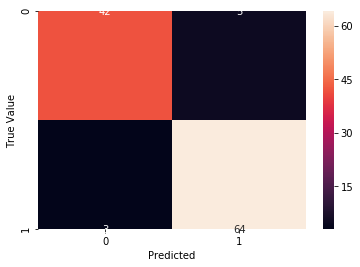

In [32]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()